In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [6]:
#import data
#dropna() due to missing data in warp and weft shrinkage
table_train=pd.read_excel("Shrinkage Data for HKU updated 5_4.xlsx").dropna()
drop_cols_train=[
            'gf_id\n品种ID',
            'gf_no\n品种号',
            'PPO_no\nPPO号',
            'fabric_no\n布号',
            'send_no\n送布单号',
            'test_date\n测试时间',
            'warp_shrinkage\n经向缩率',
            'weft_shrinkage\n纬向缩率'
            ]
table_train_X= table_train.drop(drop_cols_train,axis=1)
drop_cols_prod=[
            'NO'
            ]
table_prod_X=pd.read_excel("Data+Test+of+shrinkage+for+HKU.xlsx").drop(drop_cols_prod,axis=1)
raw_data=pd.concat([table_train_X,table_prod_X], axis=0)
raw_data.head()


,wash_method\n洗水方法,Fabric_Type\n织法,Warp_Type\n经纱纱型,Weft_Type\n纬纱纱型,Warp_Count\n经纱支,Weft_Count\n纬纱支,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,Finishing_Method\n整理方法,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,Mercerizing\n丝光碱浓
0,GW,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
1,GW,P,CF+JC,CF+JC,50+100/2,50,120,100,1+,2.0,2.0,24BE
2,GW,O,JC+CF,JC,40+80/2,20,110,54,1+,2.0,2.0,18BE
3,GW,C,JC+CF,JC+CF,50+100/2,50,150,126,1+,2.0,2.0,24BE
4,GW,C,JC,JC,50,50,150,126,1+,2.0,2.0,24BE


In [7]:
print('Number of row and columns in train+test set: ', table_train_X.shape)
print('Number of row and columns in production set: ', table_prod_X.shape)
print('Total Number of row and columns', raw_data.shape)

Number of row and columns in train+test set:  (113357, 12)
Number of row and columns in production set:  (200, 12)
Total Number of row and columns (113557, 12)


In [8]:
#clean the X
#fabric_type to int
Wash_Method_dummpy = pd.get_dummies(raw_data['wash_method\n洗水方法'],drop_first=False,prefix='wash_method')
Fabric_Type_dummpy = pd.get_dummies(raw_data['Fabric_Type\n织法'],drop_first=False,prefix='Fabric_Type')
Warp_Type_dummpy = pd.get_dummies(raw_data['Warp_Type\n经纱纱型'],drop_first=False,prefix='Warp_Type')
Weft_Type_dummpy = pd.get_dummies(raw_data['Weft_Type\n纬纱纱型'],drop_first=False,prefix='Weft_Type')
Finishing_Method_dummpy = pd.get_dummies(raw_data['Finishing_Method\n整理方法'],drop_first=False,prefix='Finishing_Method')
Mercerizing_dummpy = pd.get_dummies(raw_data['Mercerizing\n丝光碱浓'],drop_first=False,prefix='Mercerizing')
Warp_Count_dummpy = pd.get_dummies(raw_data['Warp_Count\n经纱支'],drop_first=False,prefix='Warp_Count')
Weft_Count_dummpy = pd.get_dummies(raw_data['Weft_Count\n纬纱支'],drop_first=False,prefix='Weft_Count')
dummpy_data = pd.concat([Wash_Method_dummpy, Fabric_Type_dummpy, Warp_Type_dummpy, Weft_Type_dummpy, Finishing_Method_dummpy, Mercerizing_dummpy, Mercerizing_dummpy, Warp_Count_dummpy], axis =1)
dummpy_data.head()



,wash_method_ABGA,wash_method_AGWA,wash_method_BGW,wash_method_BIP,wash_method_BSR,wash_method_CGK,wash_method_CHW,wash_method_COWA,wash_method_CSD,wash_method_CSW,...,Warp_Count_80+140/2+80\20D/2,Warp_Count_60+30/2,Warp_Count_60+40\40D/2,Warp_Count_50+80\20D/2,Warp_Count_50+100/2+80\20D/2,Warp_Count_80+80\20D/2,Warp_Count_40+40\40D/2,Warp_Count_40+50/2+80/2,Warp_Count_60+80\20D/80,Warp_Count_60+80\20D/80+120/2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
drop_convert=['wash_method\n洗水方法','Fabric_Type\n织法','Warp_Type\n经纱纱型','Weft_Type\n纬纱纱型','Finishing_Method\n整理方法','Warp_Count\n经纱支','Weft_Count\n纬纱支','Mercerizing\n丝光碱浓']
data = pd.concat([raw_data.drop(drop_convert,axis=1),dummpy_data],axis =1)
data.head()

,Warp_Density\n经纱密度,Weft_Density\n纬纱密度,GEW STD warp\nGEW经向缩率审单标准,GEW STD weft\nGEW纬向缩率审单标准,wash_method_ABGA,wash_method_AGWA,wash_method_BGW,wash_method_BIP,wash_method_BSR,wash_method_CGK,...,Warp_Count_80+140/2+80\20D/2,Warp_Count_60+30/2,Warp_Count_60+40\40D/2,Warp_Count_50+80\20D/2,Warp_Count_50+100/2+80\20D/2,Warp_Count_80+80\20D/2,Warp_Count_40+40\40D/2,Warp_Count_40+50/2+80/2,Warp_Count_60+80\20D/80,Warp_Count_60+80\20D/80+120/2
0,120,100,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120,100,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,110,54,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,150,126,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,150,126,2.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# clean the Y
warp_shrinkage = table_train['warp_shrinkage\n经向缩率'].astype(str).str.extract(r'(-?\d+.\d+)').astype('float')
warp_shrinkage.head()


,0
0,-0.80
1,0.03
2,0.50
3,0.70
4,-1.00


In [54]:
weft_shrinkage = table_train['weft_shrinkage\n纬向缩率'].astype(str).str.extract(r'(-?\d+.?\d*)').astype('float')
weft_shrinkage.head()

,0
0,-0.60
1,-0.87
2,-1.37
3,-1.13
4,-0.60


In [55]:
#split the train dataset and test dataset
X = data.head(table_train_X.shape[0]).values
Y = pd.concat([warp_shrinkage,weft_shrinkage], axis=1).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=1234)
Y_train_warp= Y_train[:, 0]
Y_train_weft= Y_train[:, 1]
Y_test_warp= Y_test[:, 0]
Y_test_weft= Y_test[:, 1]
print('Number of row and columns in X train set:', X_train.shape)
print('Number of row and columns in Y train set for warp:', Y_train_warp.shape)
print('Number of row and columns in Y train set for weft:', Y_train_weft.shape)
print('Number of row and columns in X test set:', X_test.shape)
print('Number of row and columns in Y test set for warp:', Y_test_warp.shape)
print('Number of row and columns in Y train set for weft:', Y_test_weft.shape)

Number of row and columns in X train set: (90685, 1175)
Number of row and columns in Y train set for warp: (90685,)
Number of row and columns in Y train set for weft: (90685,)
Number of row and columns in X test set: (22672, 1175)
Number of row and columns in Y test set for warp: (22672,)
Number of row and columns in Y train set for weft: (22672,)


## Train model for warp shrinkage

In [ ]:
'''模型调参'''
# #参数选择,这部分很耗时，所以暂时不要运行
# from sklearn.model_selection import RandomizedSearchCV
# criterion=['mse','mae']
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'criterion':criterion,
#                 'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# #构建模型
# clf_warp= RandomForestRegressor()
# clf_random_warp = RandomizedSearchCV(estimator=clf_warp, param_distributions=random_grid,
#                               n_iter = 10,  
#                               cv = 3, verbose=2, random_state=42, n_jobs=1)
# #回归
# clf_random_warp.fit(X_train, Y_train_warp)
# print (clf_random_warp.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=80, criterion=mae, bootstrap=False 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [1]:
%%time
rf_warp=RandomForestRegressor(criterion='mse',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10, n_estimators=1200,min_samples_leaf=2)

rf_warp.fit(X_train, Y_train_warp) 
y_train_pred_warp=rf_warp.predict(X_train)
y_test_pred_warp=rf_warp.predict(X_test) 

NameError: name 'RandomForestRegressor' is not defined

## Train model for weft shrinkage

In [ ]:
'''模型调参'''
# #参数选择,这部分很耗时，所以暂时不要运行
# from sklearn.model_selection import RandomizedSearchCV
# criterion=['mse','mae']
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
# max_depth.append(None)
# min_samples_split = [2, 5, 10]
# min_samples_leaf = [1, 2, 4]
# bootstrap = [True, False]
# random_grid = {'criterion':criterion,
#                 'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# #构建模型
# clf= RandomForestRegressor()
# clf_random = RandomizedSearchCV(estimator=clf, param_distributions=random_grid,
#                               n_iter = 10,  
#                               cv = 3, verbose=2, random_state=42, n_jobs=1)
# #回归
# clf_random.fit(X_train, Y_train_weft)
# print (clf_random.best_params_)

In [ ]:
%%time
rf_weft=RandomForestRegressor(criterion='mse',bootstrap=False,max_features='sqrt', max_depth=20,min_samples_split=10, n_estimators=1200,min_samples_leaf=2)

rf_weft.fit(X_train, Y_train_weft) 
y_train_pred_weft=rf_weft.predict(X_train)
y_test_pred_weft=rf_weft.predict(X_test) 

## Feature importance for warp shrinkage

In [ ]:
# #指标重要性
# from pyecharts.charts import Bar
# feature=data.columns
# feature_list = []
# importance_list = []
# for i in range(len(feature)):
#     if rf.feature_importances_.round(2)[i]>0.03 or rf.feature_importances_.round(2)[i]== 0.03:#将变量重要性大于0.03的显示出来
#         feature_list.append(feature[i])
#         importance_list.append(rf.feature_importances_.round(2)[i])
# bar=Bar()
# bar.add('指标重要性',feature_list, importance_list,is_label_show=True,label_text_color='#000')
# bar.render('指标重要性.html')#重点解释一下这个图像，这里面给出了哪些变量相关。

# from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,r2_score
# #下面这些指标也可以着重解释一下。
# print ("决策树模型评估--训练集：")
# print ('训练r^2:',rf.score(X_train,Y_train))
# print ('均方差',mean_squared_error(Y_train,y_train_pred))
# print ('绝对差',mean_absolute_error(Y_train,y_train_pred))
# print ('解释度',explained_variance_score(Y_train,y_train_pred))

# print ("决策树模型评估--验证集：")
# print ('验证r^2:',rf.score(X_test,Y_test))
# print ('均方差',mean_squared_error(Y_test,y_test_pred))
# print ('绝对差',mean_absolute_error(Y_test,y_test_pred))
# print ('解释度',explained_variance_score(Y_test,y_test_pred))

## Mean and std of the predicted and true warp shrinkage

In [2]:
all_data_pred_warp = rf_warp.predict(X)
all_data_true_warp = Y[:, 0]
pred_mean_warp = np.mean(all_data_pred_warp)
pred_std_warp = np.std(all_data_pred_warp)
true_mean_warp = np.mean(all_data_true_warp)
true_std_warp = np.std(all_data_true_warp)
print(pred_mean_warp,pred_std_warp)
print(true_mean_warp,true_std_warp)

NameError: name 'rf_warp' is not defined

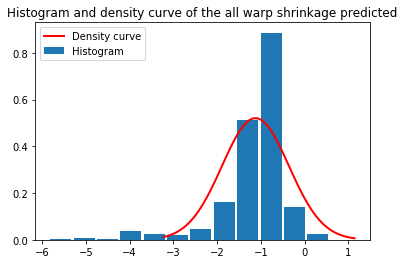

In [63]:
import scipy.stats as st 
s_warp=np.random.normal(pred_mean_warp, pred_std_warp, 500)
s_fit_warp = np.linspace(s.min(), s.max())
plt.plot(s_fit_warp, st.norm(pred_mean_warp, pred_std_warp).pdf(s_fit_warp), lw=2, c='r',label = "Density curve")
plt.hist(all_data_pred_warp,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of the all warp shrinkage predicted")
plt.legend()
plt.show()

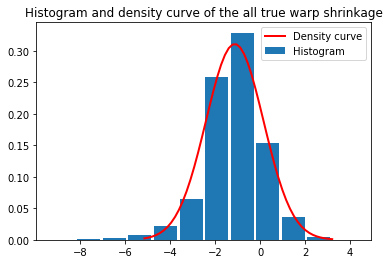

In [65]:
s=np.random.normal(true_mean_warp, true_std_warp, 500)
s_fit_warp = np.linspace(s.min(), s.max())
plt.plot(s_fit_warp, st.norm(true_mean_warp, true_std_warp).pdf(s_fit_warp), lw=2, c='r',label = "Density curve")
plt.hist(all_data_true_warp,bins=12,rwidth =0.9,density=True,label = "Histogram")
plt.title("Histogram and density curve of the all true warp shrinkage")
plt.legend()
plt.show()

## Plot the predict result for warp shrinkage

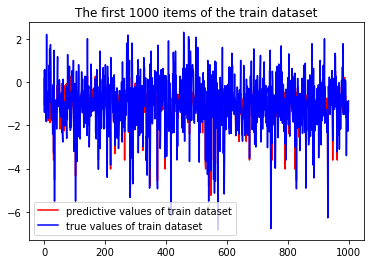

In [66]:
#the predicted results display
t = np.arange(1000)
plt.plot(t,y_train_pred_warp[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,Y_train_warp[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

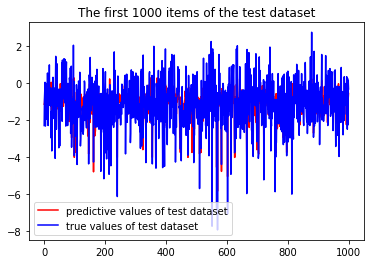

In [67]:
t = np.arange(1000)
plt.plot(t,y_test_pred_warp[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,Y_test_warp[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

## Plot the predict result for weft shrinkage

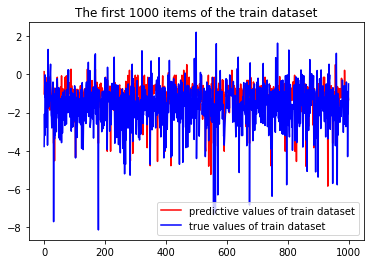

In [79]:
#the predicted results display
t = np.arange(1000)
plt.plot(t,y_train_pred_weft[0:1000],color="red",label='predictive values of train dataset')
plt.plot(t,Y_train_weft[0:1000],color="blue",label='true values of train dataset')
plt.legend()
plt.title('The first 1000 items of the train dataset')
plt.show()

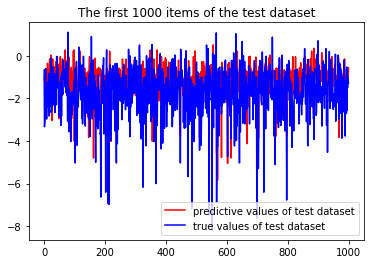

In [80]:
t = np.arange(1000)
plt.plot(t,y_test_pred_weft[0:1000],color="red",label='predictive values of test dataset')
plt.plot(t,Y_test_weft[0:1000],color="blue",label='true values of test dataset')
plt.legend()
plt.title('The first 1000 items of the test dataset')
plt.show()

## The distribution of warp shrinkage residuals

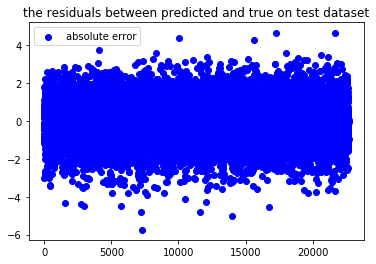

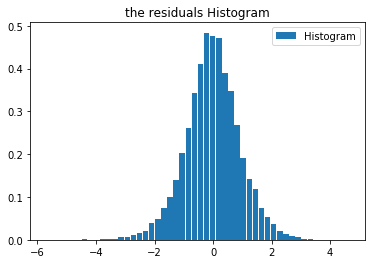

In [68]:
t = np.arange(Y_test_warp.shape[0])
residuals = Y_test_warp.ravel()-y_test_pred_warp.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

## The distribution of weft shrinkage residuals

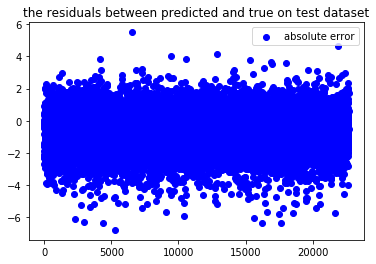

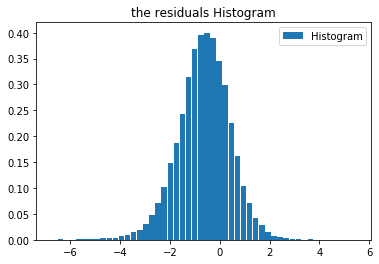

In [81]:
t = np.arange(Y_test_weft.shape[0])
residuals = Y_test_weft.ravel()-y_test_pred_weft.ravel()
plt.scatter(t,residuals,color = "blue", label = "absolute error")
plt.legend()
plt.title("the residuals between predicted and true on test dataset")
plt.show()
plt.hist(residuals, bins=50,rwidth =0.9,density=True, label = "Histogram" )
plt.legend()
plt.title("the residuals Histogram")
plt.show()

## The distribution of warp shrinkage residuals

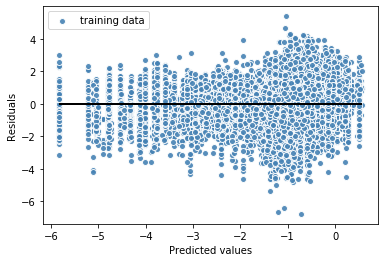

In [72]:
#残差分布图  r
plt.scatter(y_train_pred_warp,Y_train_warp-y_train_pred_warp, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train_pred_warp.min(), xmax=y_train_pred_warp.max(), lw=2, color='black')
plt.show()

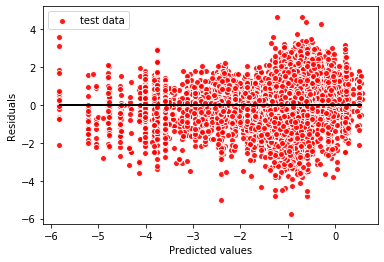

In [73]:
#残差分布图  r
plt.scatter(y_test_pred_warp,Y_test_warp-y_test_pred_warp, c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test_pred_warp.min(), xmax=y_test_pred_warp.max(), lw=2, color='black')
plt.show()



## The distribution of weft shrinkage residuals

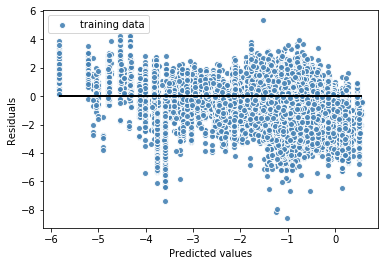

In [83]:
#残差分布图  r
plt.scatter(y_train_pred_weft,Y_train_weft-y_train_pred_weft, c='steelblue',edgecolor='white',marker='o',alpha=0.9, label='training data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_train_pred_weft.min(), xmax=y_train_pred_weft.max(), lw=2, color='black')
plt.show()

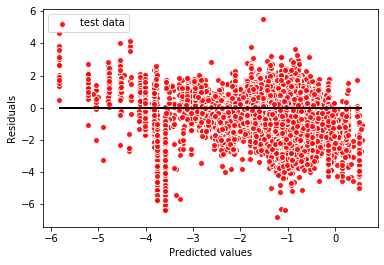

In [84]:
#残差分布图  r
plt.scatter(y_test_pred_weft,Y_test_weft-y_test_pred_weft, c='red',edgecolor='white',marker='o',alpha=0.9, label='test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=y_test_pred_weft.min(), xmax=y_test_pred_weft.max(), lw=2, color='black')
plt.show()



## Predict the production warp and weft shrinkage

In [3]:
X_prod = data.tail(table_prod_X.shape[0]).values
Y_prod_pred_warp=rf_warp.predict(X_prod)
Y_prod_pred_weft=rf_weft.predict(X_prod)

NameError: name 'data' is not defined

## Plot the predicted production warp shrinkage

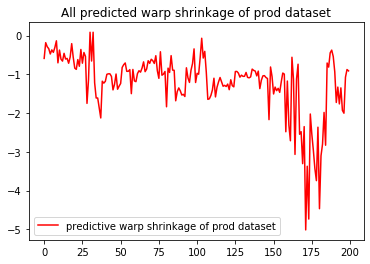

In [75]:
#the predicted prod results display
t = np.arange(Y_prod_pred_warp.shape[0])
plt.plot(t,Y_prod_pred_warp,color="red",label='predictive warp shrinkage of prod dataset')
plt.legend()
plt.title('All predicted warp shrinkage of prod dataset')
plt.show()

## Plot the predicted production weft shrinkage

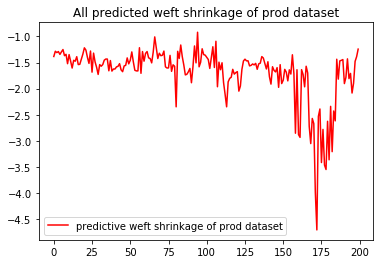

In [76]:
#the predicted prod results display
t = np.arange(Y_prod_pred_weft.shape[0])
plt.plot(t,Y_prod_pred_weft,color="red",label='predictive weft shrinkage of prod dataset')
plt.legend()
plt.title('All predicted weft shrinkage of prod dataset')
plt.show()

## Store the predicted production warf and weft shrinkage to Excel

In [78]:
Y_prod_pred_df = pd.DataFrame(list(zip(Y_prod_pred_warp, Y_prod_pred_weft)), columns=['warp_shrinkage\n经向缩率', 'weft_shrinkage\n纬向缩率'])
Y_prod_pred_df.to_excel("output.xlsx", index = False, sheet_name='shrinkage prediction') 